# 🛡️ Indian Crime Risk Analysis (2016–2018)

This notebook performs an exploratory and predictive analysis on state-wise crime data from the Government of India's NDAP (National Data & Analytics Platform) for the years 2016 to 2018.

## 🎯 Objectives
- Clean and explore government crime data across multiple years.
- Create a **custom Crime Risk Index (CRI)** by combining serious crime indicators and justice metrics.
- Classify states into **High**, **Moderate**, and **Low Risk** categories.
- Build ML models to predict crime risk levels.
- Visualize the spatial spread of crime using interactive maps and charts.

---

💡 **Note**: This project goes beyond simple EDA. It involves:
- Feature engineering,
- Risk modeling,
- Geospatial analysis,
- And machine learning — tied together with strong data storytelling.

<img src="https://targetjobs.co.uk/static/b154cbb5c1f21534595a4bf5009ba71f/e3554/scene-of-crime-officer_1140x350.webp" width="800"/>

## ⚙️ Setup

### 🔽 Basic Imports and Configurations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings as w
w.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### 📁 Downloading and Reading Files

In [2]:
id='1TDAYMzE4QLBhwOBI6r3G5EE0zEbuZmHA'
url=f'https://drive.google.com/uc?id={id}'
gdown.download(url,'df.csv',quiet=False)
df=pd.read_csv('df.csv',on_bad_lines='skip')

Downloading...
From: https://drive.google.com/uc?id=1TDAYMzE4QLBhwOBI6r3G5EE0zEbuZmHA
To: /kaggle/working/df.csv
100%|██████████| 19.9k/19.9k [00:00<00:00, 18.8MB/s]


## 📊 Data Understanding

In this section, we begin with a high-level examination of the dataset to understand:

- The structure and dimensionality of the data
- Data types and initial observations
- Basic statistics and distribution patterns
- Presence of null/missing values
- Unusual entries or potential inconsistencies

This will guide our decisions in cleaning, feature engineering, and modeling.


<img src="https://media.licdn.com/dms/image/v2/D4D12AQGGLZ3N4_RbOA/article-inline_image-shrink_400_744/article-inline_image-shrink_400_744/0/1682766611201?e=1756339200&v=beta&t=0K4IniwIe76uWL_Rz7o2BPyBd7DDOqK2grIRknR4wfc" width="800"/>

### 📝 Renaming Columns for Better Readability

- `REP` → **Reported Crimes**  
- `REG` → **Registered Crimes**

In [3]:
df.rename(columns={'Cognizable crimes reported by ipc (UOM:Number) |Scaling Factor:1':'Cognizable_crimes(REP)',
              'Registered murder cases (UOM:Number) |Scaling Factor:1':'murder_case(REG)',
              'Registered cases of offence against state (UOM:Number) |Scaling Factor:1':'Offence_against_state(REG)',
              'Cases reported under the prevention of corruption act and related sections of ipc (UOM:Number) |Scaling Factor:1':'prevention_of_corruption_act(REP)',
              'Value of property stolen (UOM:INR(IndianRupees)) |Scaling Factor:10000000':'Value_of_property_stolen',
              'Value of property recovered (UOM:INR(IndianRupees)) |Scaling Factor:10000000':'value_of_property_recovered',
              'Cases registered by railway protection force (UOM:Number) |Scaling Factor:1':'RPF_(REG)',
              'Registered cases of crime or atrocities against scheduled castes (scs) (UOM:Number) |Scaling Factor:1':'crime_against_SCs(REG)',
              'Registered cases of crime or atrocities against scheduled tribes (sts) (UOM:Number) |Scaling Factor:1':'crime_against_Sts(REG)',
              'Cognizable crimes registered under sll (special & local laws) (UOM:Number) |Scaling Factor:1':'Cognizable_crimes_under_sll(REG)',
              'Cognizable crimes registered under ipc (indian penal code) and sll (special & local laws) (UOM:Number) |Scaling Factor:1':'Cognizable_crimes_under_sll_ipc(REG)',
              'Cases registered under crime against women (including both ipc and sll (special & local laws crimes) (UOM:Number) |Scaling Factor:1':'crime_against_women(REG)',
              'Cases of crime against foreigners (UOM:Number) |Scaling Factor:1':'crime_against_foreigners',
              'Registered cyber-crime cases (UOM:Number) |Scaling Factor:1':'cyber_crime(REG)',
              'Cases registered under economic offences (UOM:Number) |Scaling Factor:1':'economics_offences(REG)',
              'Cases registered under environment related offences (UOM:Number) |Scaling Factor:1':'environmental_offence(REG)',
              'Cases registered under ipc and sll (special & local laws) in which juveniles were apprehended (UOM:Number) |Scaling Factor:1':'juveniles_sll_ipc(REG)'},inplace=True)


df['Value_of_property_stolen']=df['Value_of_property_stolen'].round(2)

In [4]:
df.shape

(108, 22)

In [5]:
df.head()


,Country,State lgd code,State,YearCode,Year,Cognizable_crimes(REP),murder_case(REG),Offence_against_state(REG),prevention_of_corruption_act(REP),Value_of_property_stolen,value_of_property_recovered,RPF_(REG),crime_against_SCs(REG),crime_against_Sts(REG),Cognizable_crimes_under_sll(REG),Cognizable_crimes_under_sll_ipc(REG),crime_against_women(REG),crime_against_foreigners,cyber_crime(REG),economics_offences(REG),environmental_offence(REG),juveniles_sll_ipc(REG)
0,India,35,Andaman And Nicobar Islands,2018,"Calendar Year (Jan - Dec), 2018",706.0,11.0,3.0,1.0,1.11,0.599067,0.0,0.0,1.0,2993.0,3699.0,147.0,3.0,7.0,37.0,0.0,25.0
1,India,28,Andhra Pradesh,2018,"Calendar Year (Jan - Dec), 2018",126635.0,935.0,173.0,151.0,112.33,49.833248,74654.0,1836.0,330.0,18068.0,144703.0,16438.0,3.0,1207.0,6473.0,91.0,966.0
2,India,12,Arunachal Pradesh,2018,"Calendar Year (Jan - Dec), 2018",2613.0,62.0,9.0,18.0,11.37,2.237018,0.0,0.0,0.0,204.0,2817.0,368.0,0.0,7.0,122.0,2.0,31.0
3,India,18,Assam,2018,"Calendar Year (Jan - Dec), 2018",112232.0,1241.0,578.0,25.0,110.18,24.137418,8698.0,8.0,6.0,8340.0,120572.0,27728.0,7.0,2022.0,8826.0,94.0,150.0
4,India,10,Bihar,2018,"Calendar Year (Jan - Dec), 2018",196911.0,2934.0,62.0,69.0,119.21,22.219691,41400.0,7061.0,64.0,65904.0,262815.0,16920.0,0.0,374.0,9209.0,152.0,671.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               108 non-null    object 
 1   State lgd code                        108 non-null    int64  
 2   State                                 108 non-null    object 
 3   YearCode                              108 non-null    int64  
 4   Year                                  108 non-null    object 
 5   Cognizable_crimes(REP)                108 non-null    float64
 6   murder_case(REG)                      108 non-null    float64
 7   Offence_against_state(REG)            108 non-null    float64
 8   prevention_of_corruption_act(REP)     108 non-null    float64
 9   Value_of_property_stolen              108 non-null    float64
 10  value_of_property_recovered           108 non-null    float64
 11  RPF_(REG)          

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State lgd code,108.0,19.166667,11.223723,1.0,9.750000,18.500000,29.250000,38.000000
YearCode,108.0,2017.000000,0.820303,2016.0,2016.000000,2017.000000,2018.000000,2018.000000
Cognizable_crimes(REP),108.0,84918.925926,96204.402122,36.0,2908.000000,41175.000000,150704.000000,346291.000000
murder_case(REG),108.0,815.925926,980.386144,0.0,32.500000,396.000000,1345.000000,4889.000000
Offence_against_state(REG),108.0,227.175926,520.772406,0.0,8.000000,38.500000,178.004772,2576.000000
prevention_of_corruption_act(REP),108.0,118.120370,194.214838,0.0,5.000000,27.000000,154.250000,1016.000000
Value_of_property_stolen,108.0,184.839352,494.546585,0.0,8.102500,40.005000,153.372500,3371.280000
value_of_property_recovered,108.0,42.638819,84.860981,0.0,1.817074,13.007197,61.919557,754.171957
RPF_(REG),108.0,30364.648148,46941.636029,0.0,32.445567,11692.000000,38754.750000,234826.000000
crime_against_SCs(REG),108.0,1174.046296,2314.449343,0.0,0.978127,102.500000,1436.000000,11924.000000


In [8]:
columns=['Cognizable_crimes(REP)', 'murder_case(REG)',
       'Offence_against_state(REG)', 'prevention_of_corruption_act(REP)',
       'Value_of_property_stolen', 'value_of_property_recovered', 'RPF_(REG)',
       'crime_against_SCs(REG)', 'crime_against_Sts(REG)',
       'Cognizable_crimes_under_sll(REG)',
       'Cognizable_crimes_under_sll_ipc(REG)', 'crime_against_women(REG)',
       'crime_against_foreigners', 'cyber_crime(REG)',
       'economics_offences(REG)', 'environmental_offence(REG)',
       'juveniles_sll_ipc(REG)']
for col in columns:
  print(col)
  print(f'MIN: {df[col].min()}')
  print(f'MAX: {df[col].max()}')
  print(f'MEAN: {df[col].mean().round()}')

Cognizable_crimes(REP)
MIN: 36.0
MAX: 346291.0
MEAN: 84919.0
murder_case(REG)
MIN: 0.0
MAX: 4889.0
MEAN: 816.0
Offence_against_state(REG)
MIN: 0.0
MAX: 2576.0
MEAN: 227.0
prevention_of_corruption_act(REP)
MIN: 0.0
MAX: 1016.0
MEAN: 118.0
Value_of_property_stolen
MIN: 0.0
MAX: 3371.28
MEAN: 185.0
value_of_property_recovered
MIN: 0.0
MAX: 754.1719575
MEAN: 43.0
RPF_(REG)
MIN: 0.0
MAX: 234826.0
MEAN: 30365.0
crime_against_SCs(REG)
MIN: 0.0
MAX: 11924.0
MEAN: 1174.0
crime_against_Sts(REG)
MIN: 0.0
MAX: 2289.0
MEAN: 187.0
Cognizable_crimes_under_sll(REG)
MIN: 14.0
MAX: 447773.0
MEAN: 53166.0
Cognizable_crimes_under_sll_ipc(REG)
MIN: 50.0
MAX: 707870.0
MEAN: 138085.0
crime_against_women(REG)
MIN: 6.0
MAX: 59445.0
MEAN: 9973.0
crime_against_foreigners
MIN: 0.0
MAX: 189.0
MEAN: 13.0
cyber_crime(REG)
MIN: 0.0
MAX: 6280.0
MEAN: 568.0
economics_offences(REG)
MIN: 0.0
MAX: 23589.0
MEAN: 4155.0
environmental_offence(REG)
MIN: 0.0
MAX: 20914.0
MEAN: 760.0
juveniles_sll_ipc(REG)
MIN: 0.0
MAX: 7369.0


In [9]:
df.isnull().sum()

Country                                 0
State lgd code                          0
State                                   0
YearCode                                0
Year                                    0
Cognizable_crimes(REP)                  0
murder_case(REG)                        0
Offence_against_state(REG)              0
prevention_of_corruption_act(REP)       0
Value_of_property_stolen                0
value_of_property_recovered             0
RPF_(REG)                               0
crime_against_SCs(REG)                  0
crime_against_Sts(REG)                  0
Cognizable_crimes_under_sll(REG)        0
Cognizable_crimes_under_sll_ipc(REG)    0
crime_against_women(REG)                0
crime_against_foreigners                0
cyber_crime(REG)                        0
economics_offences(REG)                 0
environmental_offence(REG)              0
juveniles_sll_ipc(REG)                  0
dtype: int64

In [10]:
df.nunique().sort_values()

Country                                   1
YearCode                                  3
Year                                      3
crime_against_foreigners                 33
State lgd code                           36
State                                    36
crime_against_Sts(REG)                   54
prevention_of_corruption_act(REP)        67
environmental_offence(REG)               69
crime_against_SCs(REG)                   71
Offence_against_state(REG)               82
RPF_(REG)                                85
cyber_crime(REG)                         88
juveniles_sll_ipc(REG)                   95
murder_case(REG)                         96
economics_offences(REG)                 106
Value_of_property_stolen                106
crime_against_women(REG)                107
value_of_property_recovered             107
Cognizable_crimes_under_sll(REG)        108
Cognizable_crimes_under_sll_ipc(REG)    108
Cognizable_crimes(REP)                  108
dtype: int64

## 🧾 Summary: Data Understanding

After a preliminary inspection of the dataset, we observed the following:

- 📐 **Shape**: The dataset contains `108 rows × 22 columns`.
- 🔤 **Data Types**:
  - 3 column is of type `object` 
  - 2 columns are `int64`
  - The remaining columns are all `float64`, making the dataset primarily numeric.
- 🧹 **Missing Values**: ✅ No missing/null values were found in any column — the dataset is clean and ready for processing.
- 🔁 **Column Transformations**: Initial column renaming (e.g., `REP` → `Reported_Crimes`, `REG` → `Registered_Crimes`) was done for clarity.
- 📊 **Statistical Range**: Most numeric values are continuous, and ready for normalization or risk index computation.

This dataset is structured, clean, and well-suited for EDA, feature engineering, and modeling.

## 🧠 Feature Engineering Decision

No additional feature engineering was performed on the dataset, for the following reasons:

- The dataset is already numeric and clean, with no missing values.
- All features are directly interpretable (e.g., `Total_IPC_Crimes`, `Crime_Against_Women`, `Conviction_Rate`, etc.).
- There are no categorical variables that require encoding.
- The core task — constructing a **custom Crime Risk Index (CRI)** — relies on domain-weighted combinations of existing features, which serves as our key engineered feature.

Thus, we retain the original structure and move directly toward insight extraction and index computation.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*qGkPni7n8kGxKcADasCNAQ.png' width="400">

## 📊 Exploratory Data Analysis (EDA)

With a clean and well-structured dataset (108 rows × 22 columns), we now perform exploratory analysis to uncover patterns and trends across various categories of crime in India from 2016–2018.

The key goals of this EDA are to:

- Understand the **state-wise distribution** of major crime categories.
- Analyze **property-related crimes**, **cyber crimes**, and **crimes against vulnerable groups**.
- Visualize correlations across crime types.
- Perform **geospatial mapping** of crime intensity across Indian states.

---

### 🔦 EDA Overview

We will explore the following:

1. **State-wise Distribution of Crimes Against Women**
2. **Distribution of Property Stolen & Recovered**
3. **State-wise Cyber Crime Trends**
4. **State-wise Murder Case Counts**
5. **Crimes Against Scheduled Tribes (STs)**
6. **Crimes Against Scheduled Castes (SCs)**
7. **Crimes Against Foreigners**
8. **Correlation Heatmap of All Numerical Crime Categories**
9. **Geospatial Summary of Crime Across Indian States**

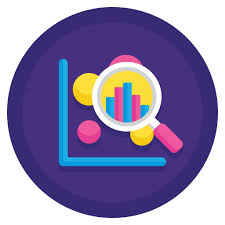

In [11]:
sns.set(style='dark')

### 👩‍🦰 Crimes Against Women — Statewise

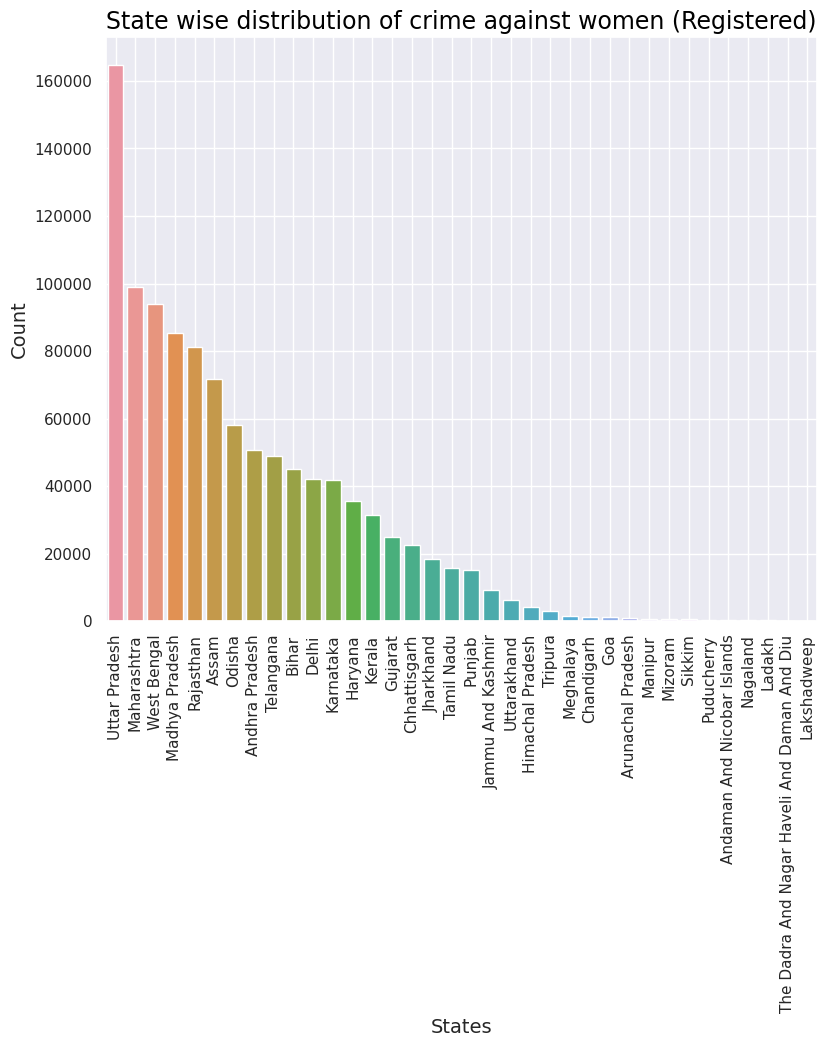

In [12]:
state_crime_against_women=df.groupby('State')['crime_against_women(REG)'].sum().reset_index().sort_values(by='crime_against_women(REG)',ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='State',y='crime_against_women(REG)',data=state_crime_against_women)
plt.xlabel('States',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of crime against women (Registered)',color='black',fontsize=17)
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('crime_against_women.png')
plt.grid()
plt.show()

### 💰 Property Crime (Stolen vs Recovered)

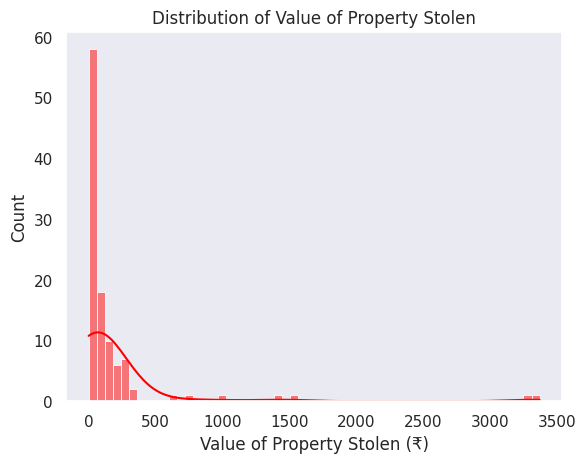

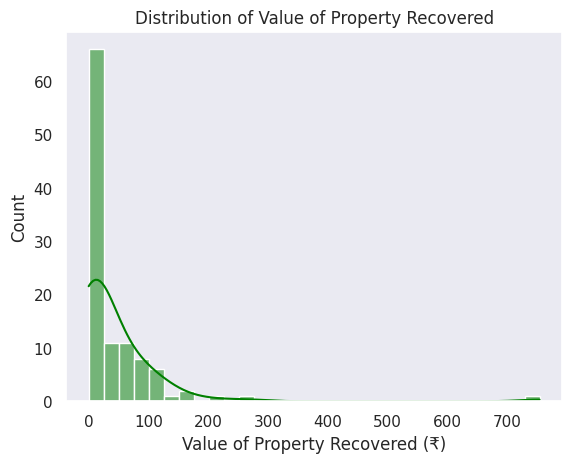

In [13]:
sns.histplot(df['Value_of_property_stolen'], kde=True, color='red')
plt.title("Distribution of Value of Property Stolen")
plt.xlabel("Value of Property Stolen (₹)")
plt.savefig('Value_of_property_stolen.png')
plt.show()
sns.histplot(df['value_of_property_recovered'], kde=True, color='green')
plt.title("Distribution of Value of Property Recovered")
plt.xlabel("Value of Property Recovered (₹)")
plt.savefig('value_of_property_recovered.png')
plt.show()

### 💻 Cyber Crimes — Statewise

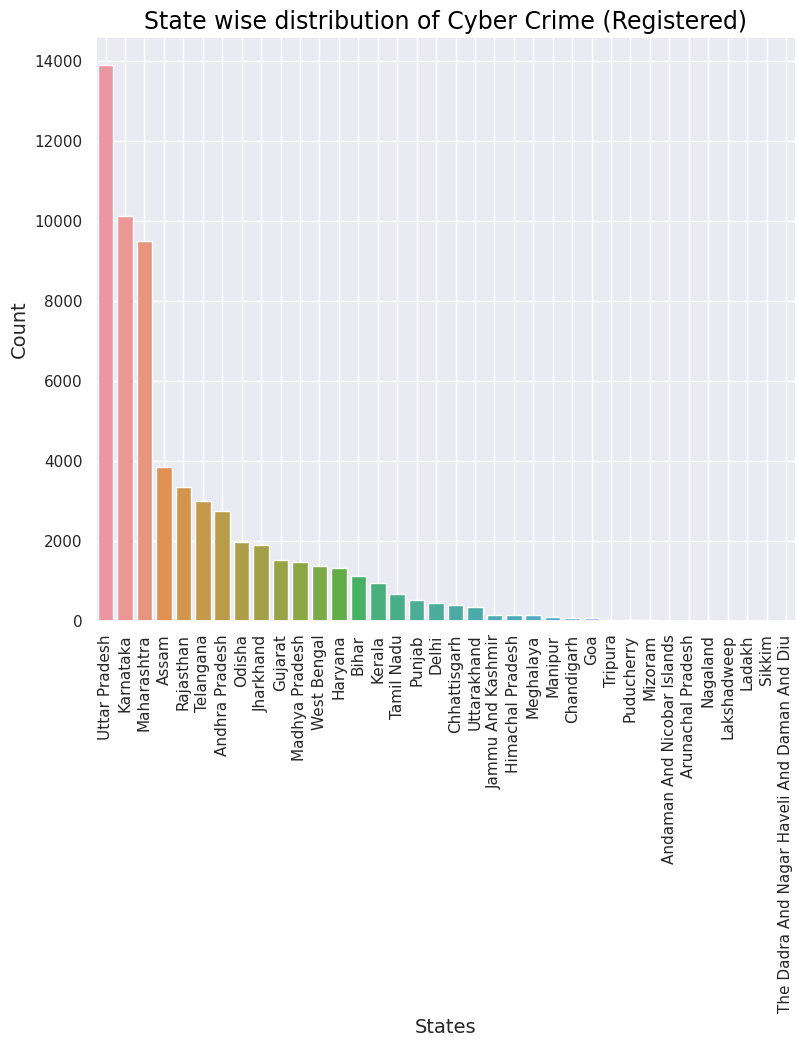

In [14]:
state_cyber_crime=df.groupby('State')['cyber_crime(REG)'].sum().reset_index().sort_values(by='cyber_crime(REG)',ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='State',y='cyber_crime(REG)',data=state_cyber_crime)
plt.xlabel('States',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of Cyber Crime (Registered)',color='black',fontsize=17)
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('cyber_crime.png')
plt.grid()
plt.show()

### 🔪 Murder Cases-Statewise

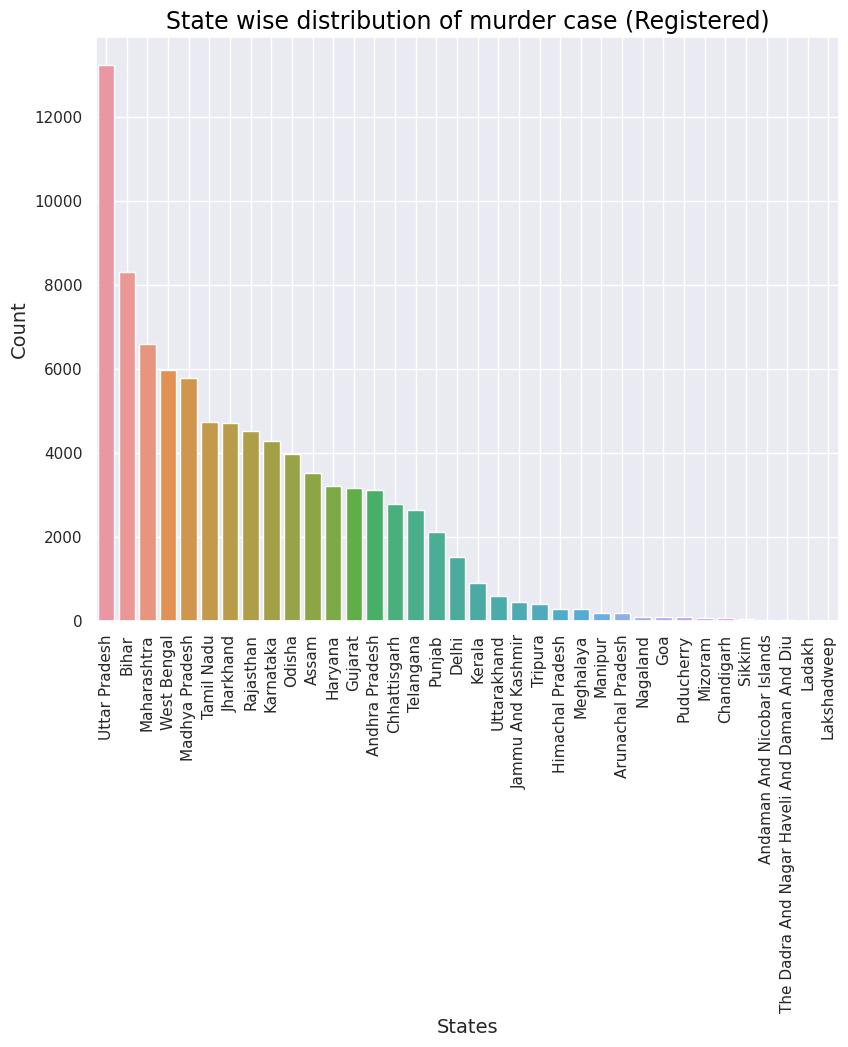

In [15]:
state_murder_case=df.groupby('State')['murder_case(REG)'].sum().reset_index().sort_values(by='murder_case(REG)',ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='State',y='murder_case(REG)',data=state_murder_case)
plt.xlabel('States',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of murder case (Registered)',color='black',fontsize=17)
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('murder_case.png')
plt.grid()
plt.show()

### 🧑‍🦱 Crimes Against SCs & STs

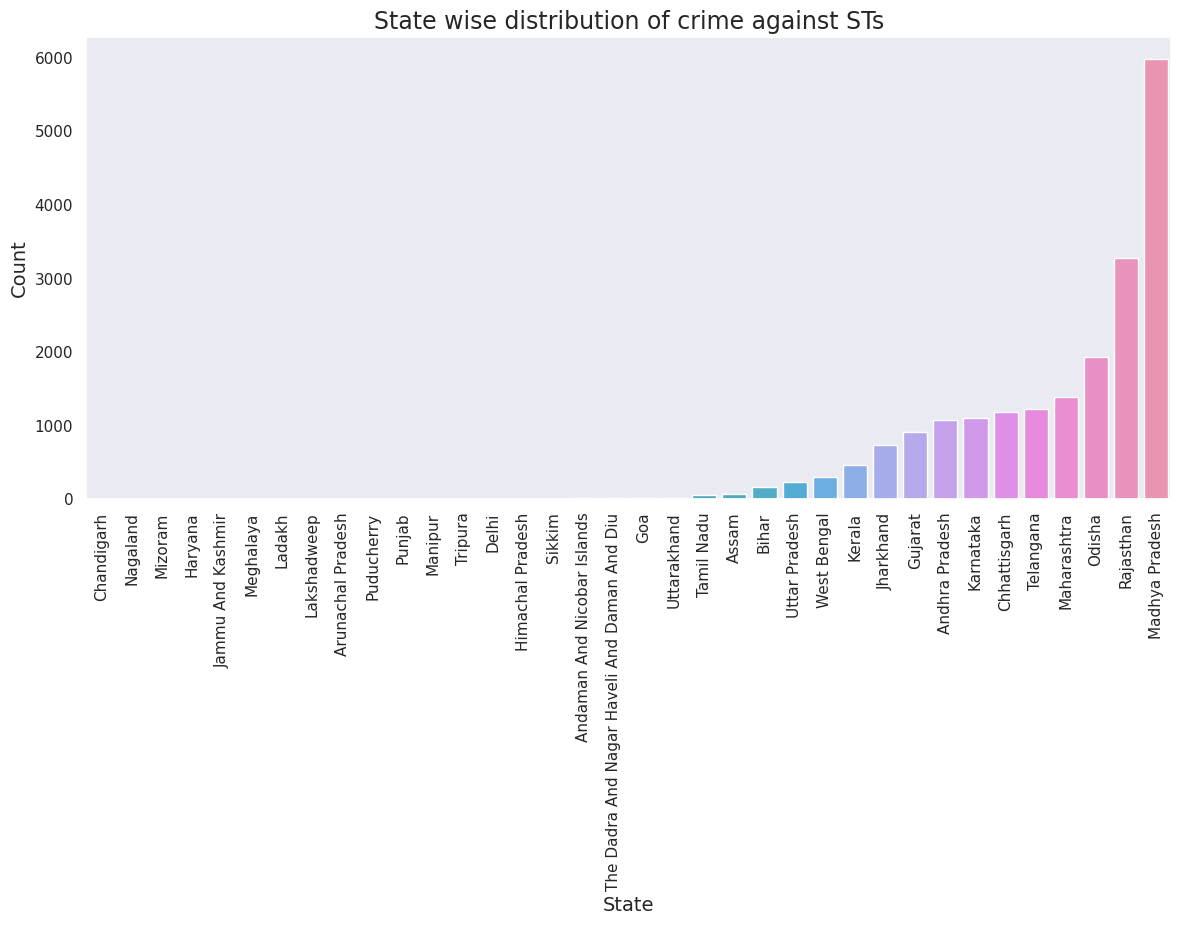

In [16]:
state_sc_st=df.groupby('State')['crime_against_Sts(REG)'].sum().reset_index().sort_values(by='crime_against_Sts(REG)',ascending=True)
plt.figure(figsize=(14,6))
sns.barplot(x='State',y='crime_against_Sts(REG)',data=state_sc_st)
plt.xticks(rotation=90)
plt.xlabel('State',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of crime against STs',fontsize=17)
plt.savefig('crime_against_Sts.png')
plt.show()

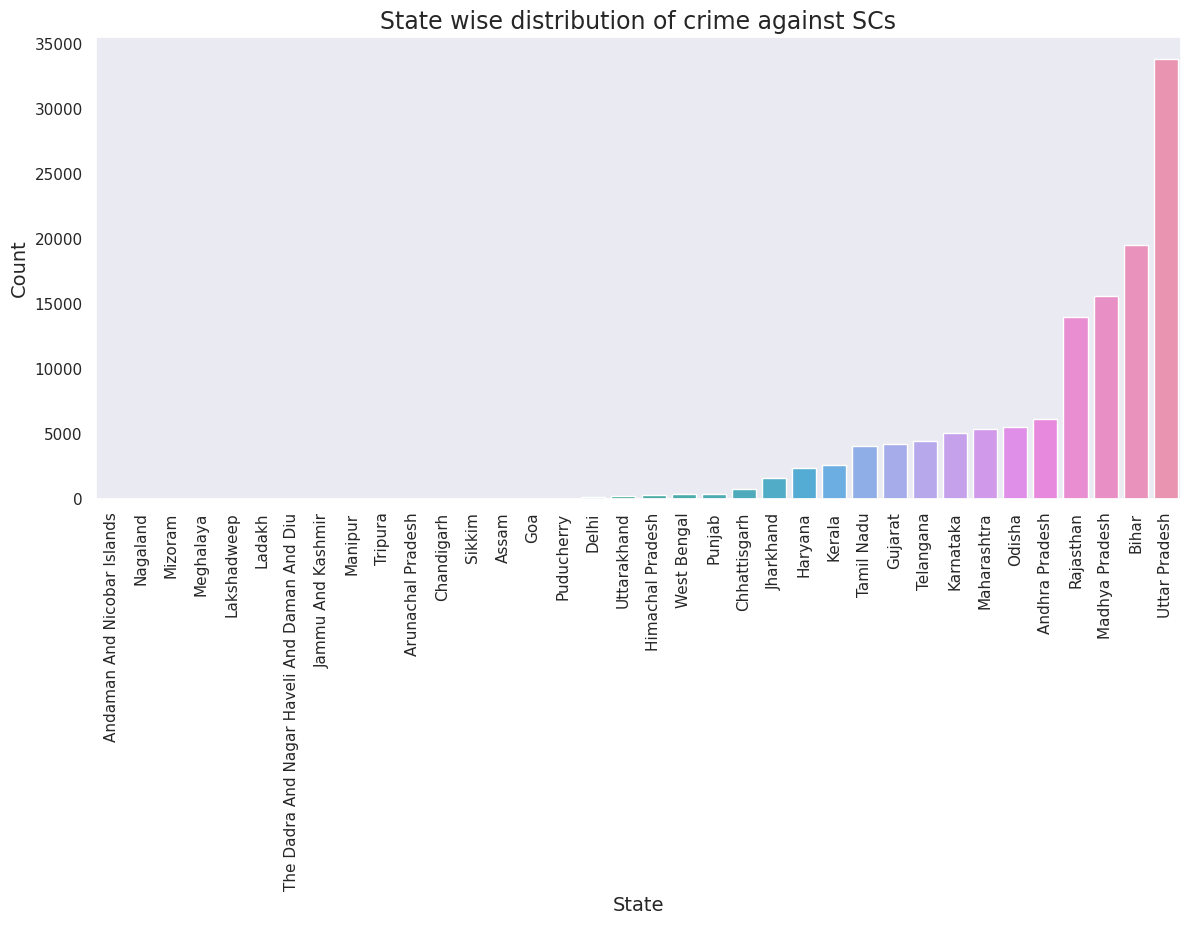

In [17]:
state_sc_st=df.groupby('State')['crime_against_SCs(REG)'].sum().reset_index().sort_values(by='crime_against_SCs(REG)',ascending=True)
plt.figure(figsize=(14,6))
sns.barplot(x='State',y='crime_against_SCs(REG)',data=state_sc_st)
plt.xticks(rotation=90)
plt.xlabel('State',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of crime against SCs',fontsize=17)
plt.savefig('crime_against_SCs.png')
plt.show()

### 👩‍🦰 Crimes Against Foreigners — Statewise

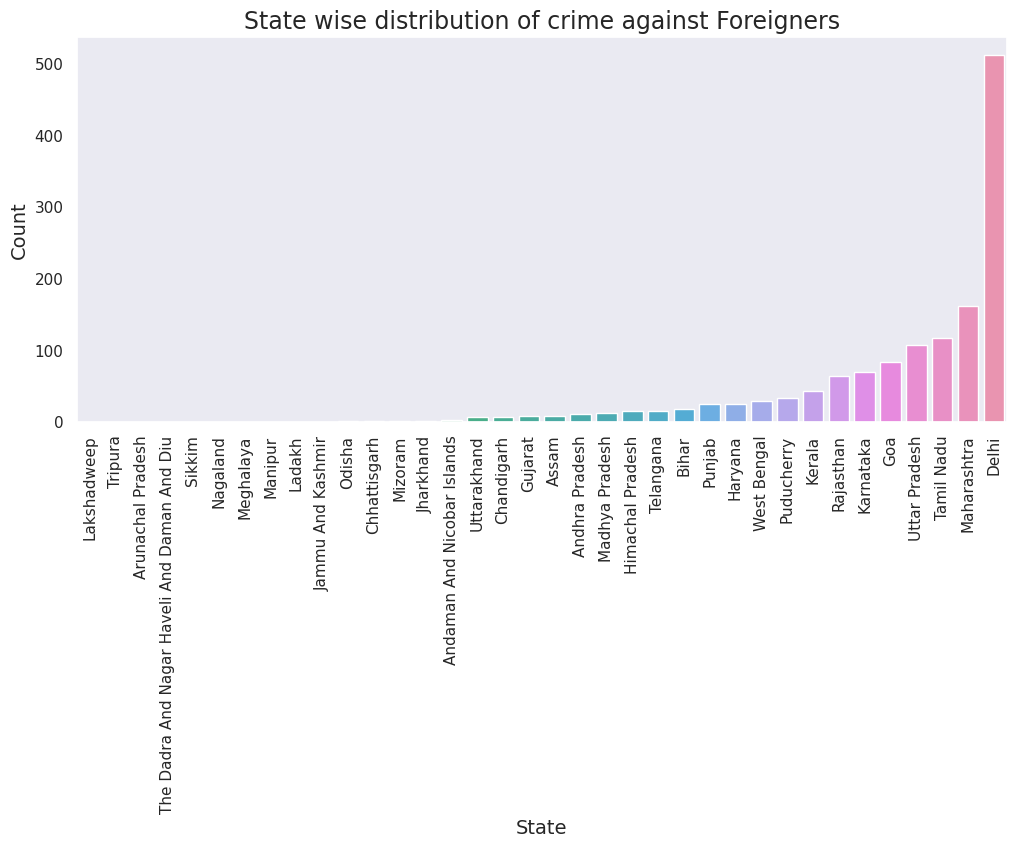

In [18]:
state_crime_against_foreigners=df.groupby('State')['crime_against_foreigners'].sum().reset_index().sort_values(by='crime_against_foreigners',ascending=True)
plt.figure(figsize=(12,5))
sns.barplot(x='State',y='crime_against_foreigners',data=state_crime_against_foreigners)
plt.xlabel('State',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('State wise distribution of crime against Foreigners',fontsize=17)
plt.xticks(rotation=90)
plt.savefig('crime_against_foreigners.png')
plt.show()

### 🔥 Correlation Heatmap

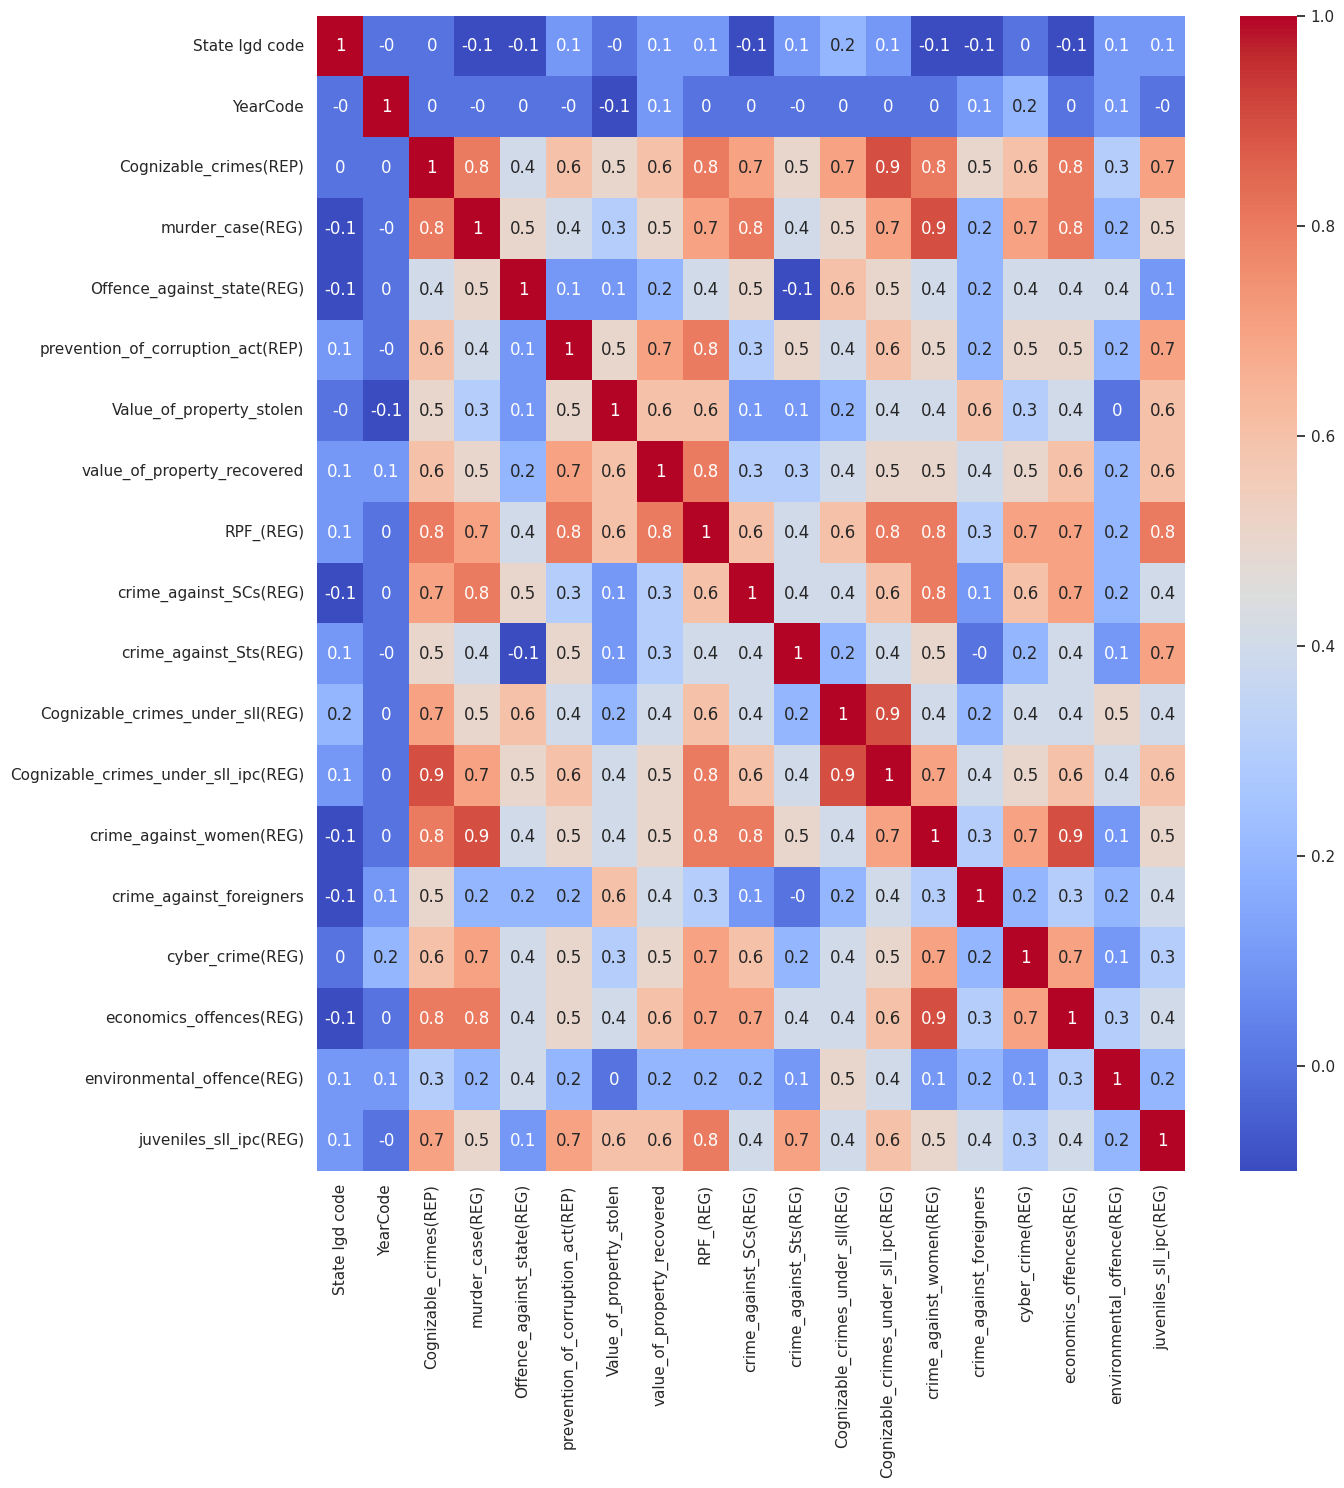

In [19]:
corr_df=df.corr(numeric_only=True).round(1)
plt.figure(figsize=(14,15))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')

### 🗺️ Geospatial EDA Overview

In [23]:
# Rum this block atleast twice and then execute maps
import geopandas as gpd
for _ in range(4):
    states_path = "/kaggle/input/india-gis-data/India States/Indian_states.shx"
    state_map = gpd.read_file(states_path)
    state_map = state_map.rename(columns={'st_nm': 'STNAME'})
    state_map = state_map.to_crs(epsg=32644)

    df['State'] = df['State'].replace({
        'JAMMU AND KASHMIR': 'JAMMU & KASHMIR',
        'ANDAMAN AND NICOBAR ISLANDS': 'ANDAMAN & NICOBAR ISLAND',
        'DELHI': 'NCT OF DELHI'
    })


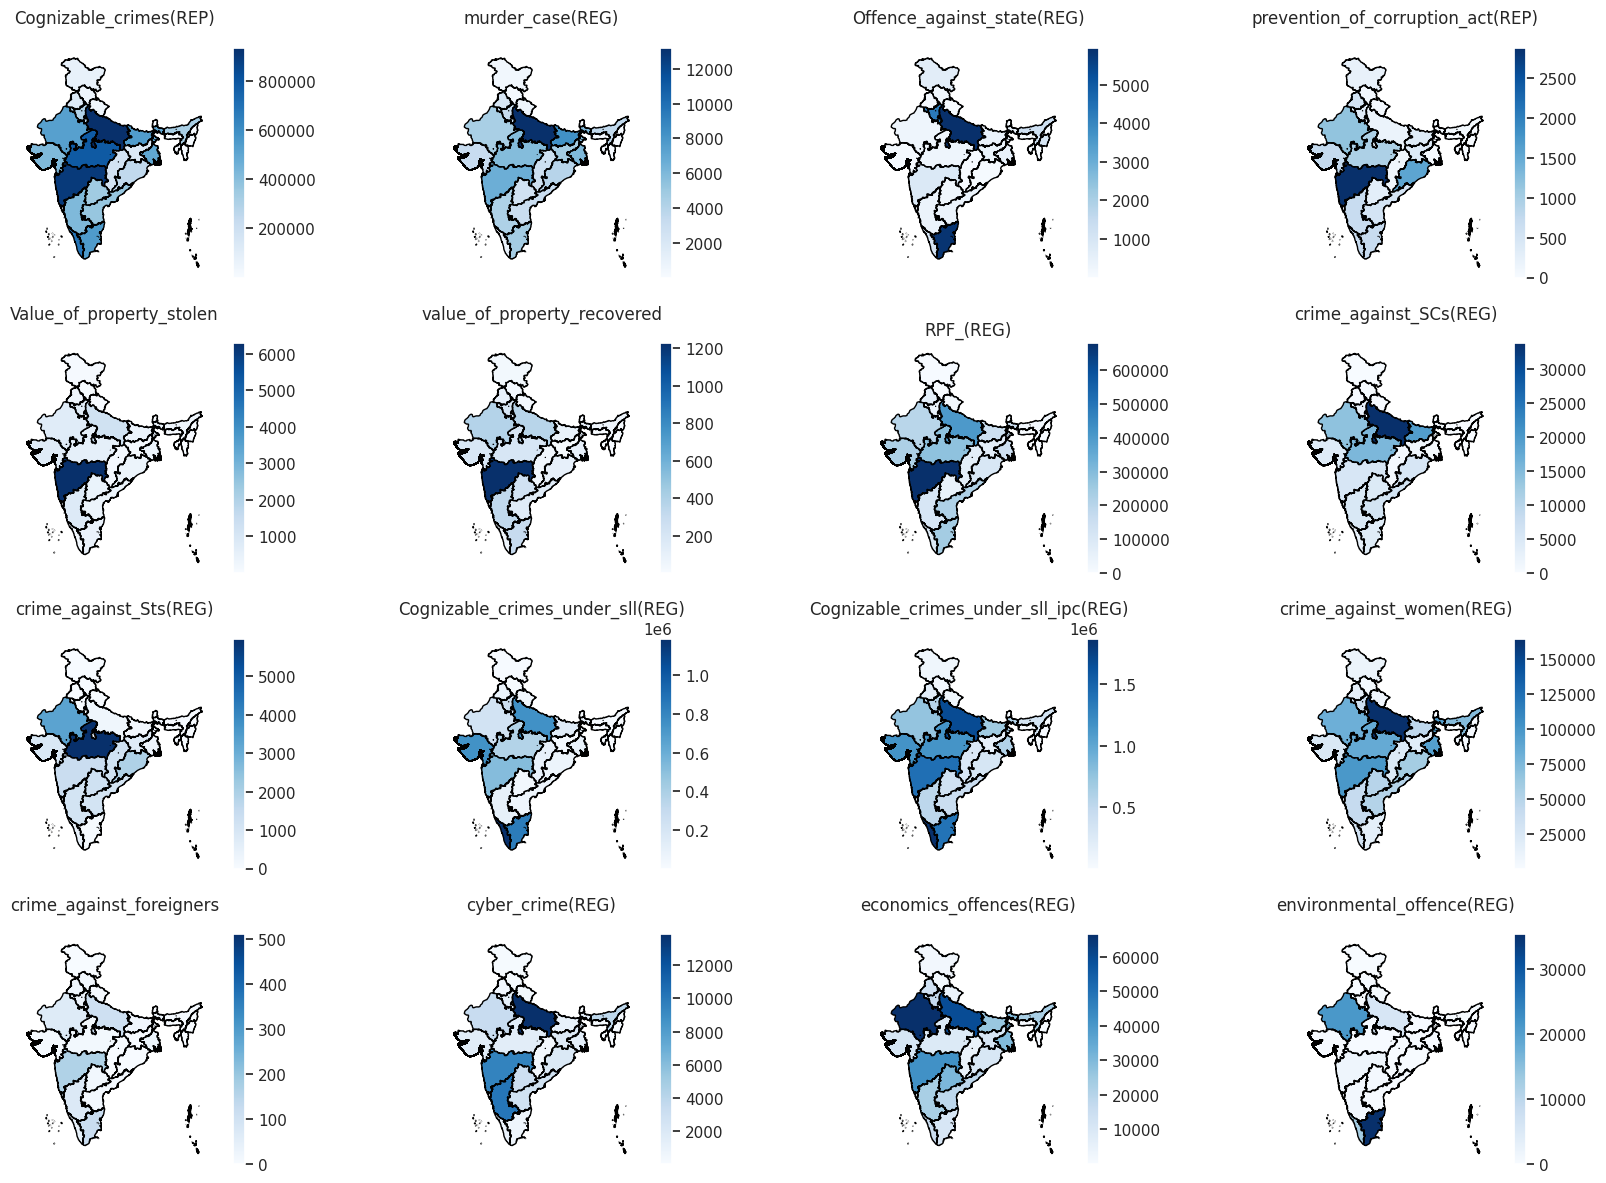

In [24]:
columns=['Cognizable_crimes(REP)', 'murder_case(REG)',
       'Offence_against_state(REG)', 'prevention_of_corruption_act(REP)',
       'Value_of_property_stolen', 'value_of_property_recovered', 'RPF_(REG)',
       'crime_against_SCs(REG)', 'crime_against_Sts(REG)',
       'Cognizable_crimes_under_sll(REG)',
       'Cognizable_crimes_under_sll_ipc(REG)', 'crime_against_women(REG)',
       'crime_against_foreigners', 'cyber_crime(REG)',
       'economics_offences(REG)', 'environmental_offence(REG)',
       'juveniles_sll_ipc(REG)']
df['State'] = df['State'].str.strip().str.upper()
state_map['STNAME'] = state_map['STNAME'].str.strip().str.upper()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns[:16]):
    state_cols = df.groupby('State')[col].sum().reset_index()
    merged = state_map.merge(state_cols, left_on='STNAME', right_on='State', how='inner')
    merged = merged[merged['geometry'].notna()]

    merged.plot(column=col, ax=axes[i], cmap='Blues', legend=True, edgecolor='black')
    axes[i].set_title(col)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('map_base.png')
plt.show()


## 📌 Overall EDA Summary

Across the various categories of crime explored, a consistent geographic pattern emerges:

- **Uttar Pradesh** consistently appears at or near the top in most crime categories, marking it as a high-priority state for policy attention and safety measures.
- Other high-incidence states include **Bihar, Maharashtra, West Bengal**, and **Madhya Pradesh**, likely due to dense populations and/or systemic enforcement or reporting challenges.
- On the opposite end, **Lakshadweep, Sikkim, Daman & Diu**, and **Andaman & Nicobar Islands** report the lowest crime figures — largely attributed to smaller populations and possibly limited reporting mechanisms.

This state-wise analysis reveals a clear **regional divide**:
- **Central and northern states** report higher crime rates.
- **Northeastern states and union territories** generally remain on the lower end.

> 💡 These insights are essential for building the **Crime Risk Index (CRI)**, as they help identify outlier states and validate the weighting logic used in feature selection.


## 📊 Crime Risk Index (CRI)

## 📊 Crime Risk Index (CRI) — Overview

To move beyond raw crime counts and understand **relative crime severity** across Indian states, we developed a custom **Crime Risk Index (CRI)** — a composite score that aggregates and weights various crime indicators based on their societal impact.

### 🎯 Why CRI?

- 📍 Compare states objectively, regardless of population or size  
- ⚖️ Capture severity, frequency, and diversity of crimes in a unified metric  
- 🧭 Categorize states into **Low**, **Moderate**, **High**, and **Very High** risk levels for easier interpretation

### 🛠️ How It’s Built

- 🔄 Normalize selected crime-related columns  
- ⚖️ Apply **custom weights** to reflect relative importance of each feature  
- ➕ Aggregate into a single scaled CRI score (ranging from ~0 to 270+)  
- 🧩 Map final scores into **4 risk categories** for visualization and modeling

### 📌 What It Enables

- 🗺️ Geospatial crime mapping  
- 🤖 Machine learning model training  
- 🛡️ Risk profiling and strategic safety interventions


### 📋 CRI Overview & Formula

In [25]:
weights={'Cognizable_crimes(REP)':0.01,
        'murder_case(REG)':0.9,
        'Offence_against_state(REG)':0.01,
        'prevention_of_corruption_act(REP)':0.01,
        'Value_of_property_stolen':0.01,
        'value_of_property_recovered':0.01,
        'RPF_(REG)':0.01,
        'crime_against_SCs(REG)':0.3,
        'crime_against_Sts(REG)':0.4,
        'Cognizable_crimes_under_sll(REG)':0.05,
        'Cognizable_crimes_under_sll_ipc(REG)':0.05,
        'crime_against_women(REG)':1,
        'crime_against_foreigners':0.7,
        'cyber_crime(REG)':0.6,
        'economics_offences(REG)':0.1,
        'environmental_offence(REG)':0.01,
        'juveniles_sll_ipc(REG)':0.01}


df['Risk_index']=0
for col,weight in weights.items():
  col_min=df[col].min()
  col_max=df[col].max()
  df[col+'_norm']=(df[col]-col_min)/(col_max-col_min)
  df['Risk_index']+=df[col+'_norm'] * weight
df['Risk_index']=df['Risk_index'].round(3)

In [26]:
print(df['Risk_index'])

0      0.017
1      0.730
2      0.019
3      0.969
4      1.124
5      0.023
6      0.426
7      1.100
8      0.143
9      0.594
10     0.595
11     0.091
12     0.104
13     0.603
14     1.282
15     0.455
16     0.002
17     0.001
18     1.453
19     1.884
20     0.019
21     0.036
22     0.014
23     0.008
24     0.853
25     0.011
26     0.294
27     1.375
28     0.006
29     0.760
30     0.723
31     0.004
32     0.044
33     3.091
34     0.125
35     1.009
36     0.005
37     0.756
38     0.021
39     0.770
40     1.091
41     0.021
42     0.424
43     1.009
44     0.119
45     0.541
46     0.560
47     0.068
48     0.092
49     0.521
50     1.085
51     0.519
52     0.002
53     0.000
54     1.544
55     1.775
56     0.026
57     0.031
58     0.014
59     0.009
60     0.857
61     0.009
62     0.289
63     1.322
64     0.007
65     0.702
66     0.762
67     0.004
68     0.041
69     2.851
70     0.110
71     1.115
72     0.006
73     0.735
74     0.016
75     0.671
76     0.980

In [27]:
df['Risk_index'] = 100 * ((df['Risk_index'] - df['Risk_index'].min()) / (df['Risk_index'].max() - df['Risk_index'].min()))

In [28]:
state_risk=df.groupby('State')['Risk_index'].mean().reset_index().sort_values(by='Risk_index',ascending=True)
print(state_risk)


                                           State  Risk_index
16                                   LAKSHADWEEP    0.010784
15                                        LADAKH    0.064704
31  THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU    0.118624
28                                        SIKKIM    0.204896
22                                      NAGALAND    0.291168
0                       ANDAMAN & NICOBAR ISLAND    0.301952
21                                       MIZORAM    0.388224
2                              ARUNACHAL PRADESH    0.603904
19                                       MANIPUR    0.722528
5                                     CHANDIGARH    0.808800
20                                     MEGHALAYA    1.067616
32                                       TRIPURA    1.412704
25                                    PUDUCHERRY    1.628383
10                              HIMACHAL PRADESH    2.415615
11                               JAMMU & KASHMIR    2.997951
34                      

### 📊 Multi-Level Risk Mapping

In [29]:
def mapped(score):
    if 0 <= score <= 5:
        return 'Very Low'
    elif 6 <= score <= 15:
        return 'Low'
    elif 16 <= score <= 30:
        return 'Medium'
    elif 31 <= score <= 70:
        return 'High'
    elif score > 70:
        return 'Very High'
    else:
        return 'Unknown'

df['Risk_index_mapped']=df['Risk_index'].apply(mapped)
df['Risk_index_mapped'].fillna(df['Risk_index_mapped'].mode()[0])

0       Very Low
1         Medium
2       Very Low
3           High
4           High
5       Very Low
6            Low
7           High
8       Very Low
9         Medium
10        Medium
11      Very Low
12      Very Low
13        Medium
14          High
15           Low
16      Very Low
17      Very Low
18          High
19          High
20      Very Low
21      Very Low
22      Very Low
23      Very Low
24        Medium
25      Very Low
26           Low
27          High
28      Very Low
29        Medium
30        Medium
31      Very Low
32      Very Low
33     Very High
34      Very Low
35          High
36      Very Low
37        Medium
38      Very Low
39        Medium
40          High
41      Very Low
42           Low
43          High
44      Very Low
45        Medium
46        Medium
47      Very Low
48      Very Low
49        Medium
50          High
51        Medium
52      Very Low
53      Very Low
54          High
55          High
56      Very Low
57      Very Low
58      Very L

In [30]:
grouped_staets_by_map=df.groupby(['Risk_index_mapped','State']).size().reset_index(name='Count')
print(grouped_staets_by_map)

   Risk_index_mapped                                         State  Count
0               High                                         ASSAM      1
1               High                                         BIHAR      3
2               High                                     KARNATAKA      2
3               High                                MADHYA PRADESH      3
4               High                                   MAHARASHTRA      3
5               High                                  NCT OF DELHI      3
6               High                                     RAJASTHAN      3
7               High                                   WEST BENGAL      3
8                Low                                  CHHATTISGARH      3
9                Low                                        KERALA      1
10               Low                                        PUNJAB      3
11            Medium                                ANDHRA PRADESH      3
12            Medium                  

## 📊 Crime Risk Index (CRI) — Multi-Level Risk Mapping

To refine our understanding of crime exposure across Indian states, we transformed the continuous **Crime Risk Index (CRI)** into **five discrete risk levels**. This stratification improves interpretability and helps in comparative analysis.

### 🧮 Risk Mapping Logic

| CRI Score Range | Risk Level    |
|------------------|---------------|
| 0 – 5            | Very Low      |
| 6 – 15           | Low           |
| 16 – 30          | Medium        |
| 31 – 70          | High          |
| > 70             | Very High     |

### 📌 Why This Mapping Matters

- 📍 Enables **visualization** of crime intensity across Indian states  
- 🎯 Creates **classification labels** for machine learning models  
- 📢 Improves clarity in **dashboards, reports**, and decision-making tools

Each state is now assigned a risk category based on its CRI score — turning raw numbers into clear, actionable labels.


## 🤖 Crime Risk Prediction — Simple Model

Now that we’ve created the **Crime Risk Index (CRI)** and mapped it into 5 risk categories (`Very Low` to `Very High`), the next step is to build a simple machine learning model to **predict a state’s risk level** using historical crime data.

### 🎯 Objective

Train a basic classification model that learns from crime statistics and predicts the associated risk category for each state.

### 🧾 Target Variable

- `Risk_index_mapped` — the categorical label representing the crime risk level.

### 📥 Features Used

We use the same crime-based features that contributed to the CRI, such as:
- Cognizable crimes  
- Murder cases  
- Cyber crimes  
- Crimes against women, SCs, and STs  
- Property-related crimes  
- And more

### 🛠️ Modeling Approach

- Model: **Logistic Regression**  
- Split: Simple **train-test split**, no cross-validation  
- Focus: Build a **baseline model** to test the feasibility of prediction, not to maximize accuracy

This model demonstrates that even with a straightforward setup, we can extract meaningful insights and generate predictions from public crime datasets.


In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

X=df.drop('Risk_index_mapped',axis=1)
y=df['Risk_index_mapped']

num=X.select_dtypes(include=['number']).columns.tolist()
cat=X.select_dtypes(include=['object']).columns.tolist()
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

pre=ColumnTransformer([('scaler',StandardScaler(),num),
                       ('encoder',OneHotEncoder(drop='first'),cat)])
lrf=LogisticRegression(random_state=42)
model=Pipeline([('pre',pre),
 ('DTR',lrf)])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Classification Report : {classification_report(y_test,y_pred)}')
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}    |    Predicted: {predicted}")

Accuracy : 0.9545454545454546
Classification Report :               precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       0.67      1.00      0.80         2
      Medium       1.00      0.75      0.86         4
   Very High       1.00      1.00      1.00         1
    Very Low       1.00      1.00      1.00        11

    accuracy                           0.95        22
   macro avg       0.93      0.95      0.93        22
weighted avg       0.97      0.95      0.96        22

Actual: Very Low    |    Predicted: Very Low
Actual: Medium    |    Predicted: Low
Actual: High    |    Predicted: High
Actual: Very Low    |    Predicted: Very Low
Actual: Low    |    Predicted: Low


## 🗺️ Final Risk Index Map Overview

This choropleth map displays the **crime risk levels** across Indian states based on our custom **Crime Risk Index (CRI)**.

Each state is color-coded according to its assigned risk category:
- Very Low  
- Low  
- Medium  
- High  
- Very High  

### 📌 Key Observations
- **Uttar Pradesh** and **Maharashtra** appear in the **Very High** risk zone.
- Smaller or less populated states like **Sikkim** and **Lakshadweep** fall under **Low** or **Very Low** risk.
- The map highlights regions that may require **greater policy focus** and **resource allocation**.

This visualization provides a quick, intuitive view of the **overall crime risk landscape in India**, enhancing both communication and decision-making.


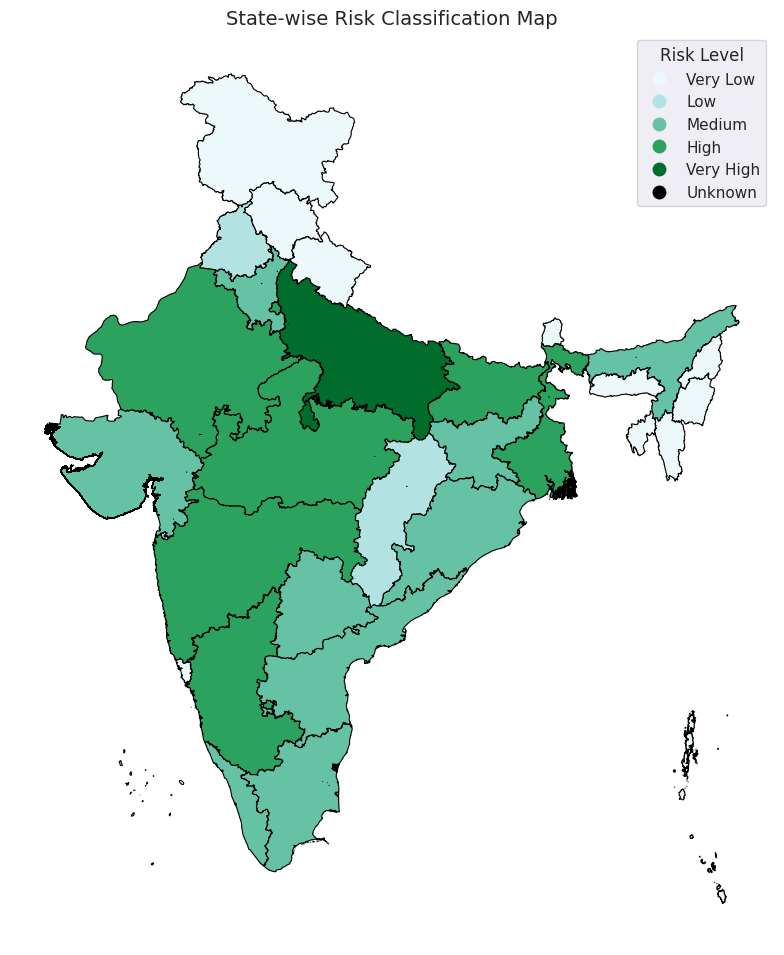

In [32]:
from matplotlib.colors import ListedColormap

df['State'] = df['State'].str.strip().str.upper()
state_map['STNAME'] = state_map['STNAME'].str.strip().str.upper()
state_group = df.groupby('State')['Risk_index_mapped'].agg(lambda x: x.value_counts().idxmax()).reset_index()
merged = state_map.merge(state_group, left_on='STNAME', right_on='State', how='inner')
merged = merged[merged['geometry'].notna()]
categories = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Unknown']
colors = ['#edf8fb', '#b2e2e2', '#66c2a4', '#2ca25f', '#006d2c', '#000000']
cmap = ListedColormap(colors)
merged['Risk_index_mapped'] = pd.Categorical(
    merged['Risk_index_mapped'],
    categories=categories,
    ordered=True)

fig, ax = plt.subplots(figsize=(8, 10))
merged.plot(
    column='Risk_index_mapped',
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    categorical=True,
    legend_kwds={'title': 'Risk Level'})

plt.axis('off')
plt.title("State-wise Risk Classification Map", fontsize=14)
plt.tight_layout()
plt.savefig('map_risk_index.png')
plt.show()


## ✅ Conclusion & Final Thoughts

This project explored crime trends across Indian states using data from 2016 to 2018. By combining exploratory data analysis, a custom-built Crime Risk Index (CRI), geospatial visualization, and a basic machine learning model, we were able to:

- Highlight high-risk and low-risk regions using both raw data and a composite index  
- Visualize key crime patterns across various categories  
- Demonstrate that even simple models can predict crime risk levels effectively

While this is a baseline approach, it lays a solid foundation for future work — including time-series analysis, deep learning models, or real-time crime prediction systems.

> This notebook is not just an analysis, but a data-driven story about crime in India — one that’s transparent, reproducible, and open for improvement.
